In [48]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [26]:
ten_rand=pd.read_csv('ten_rand.csv')

In [27]:
ten_rand.shape

(50000, 11)

In [28]:
ten_dum = pd.get_dummies(ten_rand, columns = ['EJECTION','AIRBAG_DEPLOYED',
       'SAFETY_EQUIPMENT',
       'MODEL','FIRST_CONTACT_POINT','SEX','AGE','CRASH_HOUR','CRASH_MONTH'])

In [29]:
ten_rand.columns


Index(['Unnamed: 0', 'EJECTION', 'AIRBAG_DEPLOYED', 'SAFETY_EQUIPMENT',
       'MODEL', 'FIRST_CONTACT_POINT', 'INJURIES_TOTAL', 'SEX', 'AGE',
       'CRASH_HOUR', 'CRASH_MONTH'],
      dtype='object')

In [30]:
ten_rand.columns

Index(['Unnamed: 0', 'EJECTION', 'AIRBAG_DEPLOYED', 'SAFETY_EQUIPMENT',
       'MODEL', 'FIRST_CONTACT_POINT', 'INJURIES_TOTAL', 'SEX', 'AGE',
       'CRASH_HOUR', 'CRASH_MONTH'],
      dtype='object')

In [31]:
ten_dum.columns

Index(['Unnamed: 0', 'INJURIES_TOTAL', 'EJECTION_NONE',
       'EJECTION_PARTIALLY EJECTED', 'EJECTION_TOTALLY EJECTED',
       'EJECTION_TRAPPED/EXTRICATED', 'EJECTION_UNKNOWN',
       'AIRBAG_DEPLOYED_DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)',
       'AIRBAG_DEPLOYED_DEPLOYED, COMBINATION',
       'AIRBAG_DEPLOYED_DEPLOYED, FRONT',
       ...
       'CRASH_MONTH_3', 'CRASH_MONTH_4', 'CRASH_MONTH_5', 'CRASH_MONTH_6',
       'CRASH_MONTH_7', 'CRASH_MONTH_8', 'CRASH_MONTH_9', 'CRASH_MONTH_10',
       'CRASH_MONTH_11', 'CRASH_MONTH_12'],
      dtype='object', length=1313)

In [42]:
y = ten_dum['INJURIES_TOTAL']
X = ten_dum.drop(columns = ['INJURIES_TOTAL','Unnamed: 0'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
model = LogisticRegression(n_jobs= -1)
model.fit(X_train,y_train)

samp_pred = model.predict(X_test)
samp_score = model.score(X_test,y_test)
samp_recall =metrics.recall_score(y_test,samp_pred)

In [43]:
samp_pred,samp_score,samp_recall

(array([0., 0., 0., ..., 1., 1., 0.]), 0.8474, 0.27309236947791166)

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


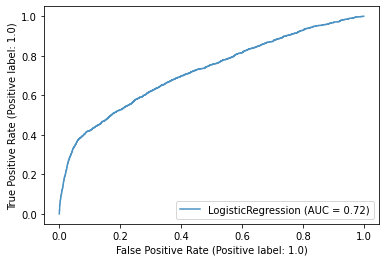

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:

model.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)

plt.show()

In [47]:
y = ten_dum['INJURIES_TOTAL']
X = ten_dum.drop(columns = ['INJURIES_TOTAL'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2 , random_state = 0)
rfc = RandomForestClassifier(n_estimators = 20,random_state = 0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [53]:
random_score = rfc.score(X_test,y_test)
random_recall= metrics.recall_score(y_test,y_pred)
metrics.confusion_matrix(y_test,y_pred)
random_score,random_recall

(0.8454, 0.2214572576018359)

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


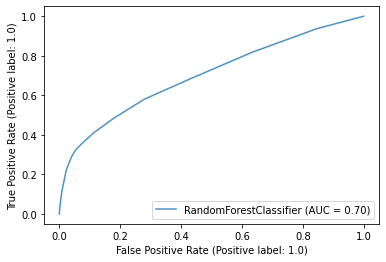

In [50]:

rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)

plt.show()

In [37]:
print(metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred))

0.671304347826087 0.2214572576018359


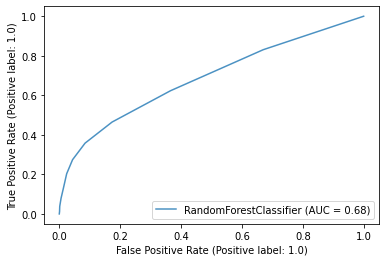

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)

plt.show()

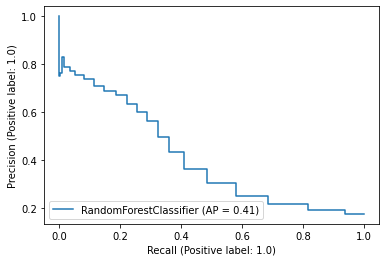

In [49]:

disp = plot_precision_recall_curve(rfc, X_test, y_test)

In [40]:
metrics.confusion_matrix(y_test,y_pred)

NameError: name 'confusion_matrix' is not defined

In [ ]:

# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

# Test function

calc_precision_recall(y_test, y_pred)

In [ ]:

# Use sklearn to plot precision-recall curves

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(regressor, X_test, y_test, name = 'Random Classifer')




In [ ]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
)
